In [1]:
import mne 

In [2]:
%pwd

'/Users/sabrinebendimerad/Desktop/project/MCNN/mfa-internship/notebooks'

In [3]:
raw = mne.io.read_raw_fif("../data/sub-01_ses-01_task-rest_proc-filt_raw.fif")

Opening raw data file ../data/sub-01_ses-01_task-rest_proc-filt_raw.fif...
    Range : 34500 ... 116999 =    138.000 ...   467.996 secs
Ready.


In [4]:
raw

<Raw | sub-01_ses-01_task-rest_proc-filt_raw.fif, 356 x 82500 (330.0 s), ~539 KiB, data not loaded>

Using matplotlib as 2D backend.


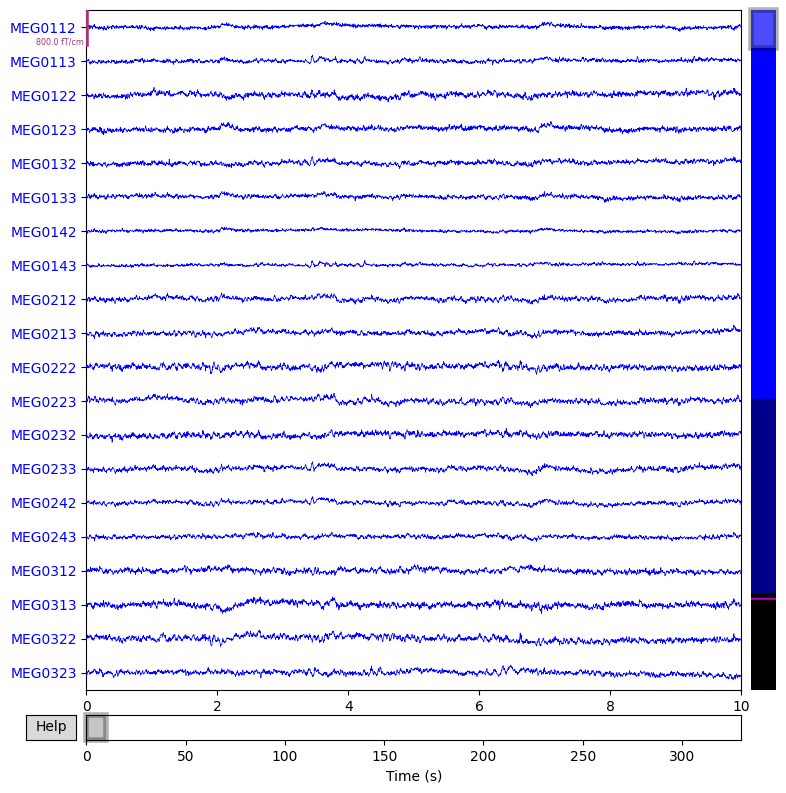

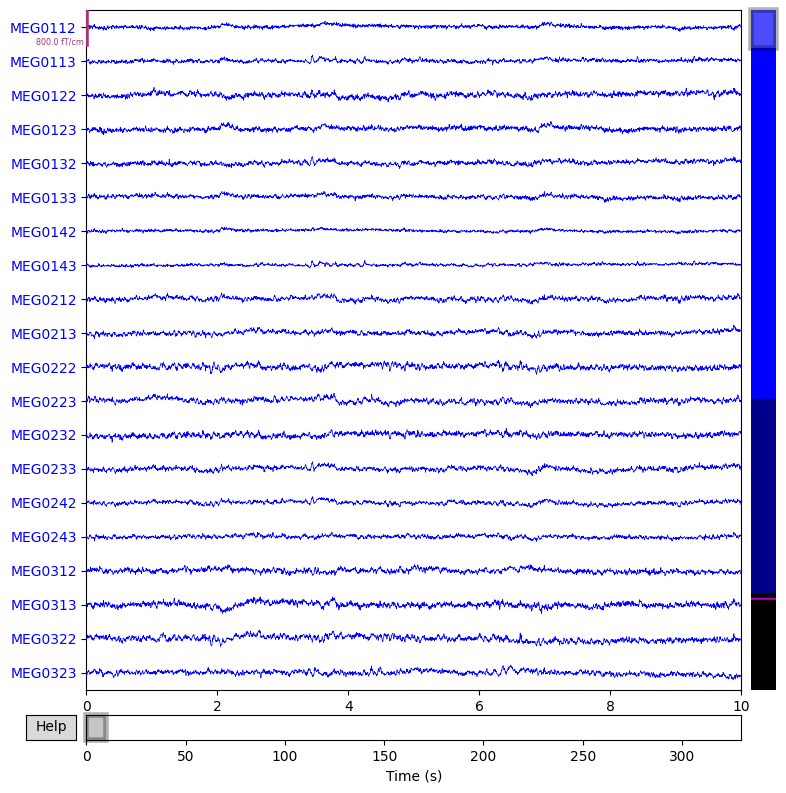

In [6]:
raw.plot()

In [ ]:
raw.pick()

In [11]:
# Make a copy and pick MEG channels by type
raw_meg = raw.copy().pick('meg')  # Magnetometers and gradiometers

# Apply filtering
#raw_meg_filtered = raw_meg.filter(l_freq=8.0, h_freq=12.0)


In [13]:
data_matrix = raw_meg.get_data()

In [14]:
print(data_matrix.shape)
type(data_matrix)

(306, 82500)


numpy.ndarray

In [18]:
raw.info["sfreq"]

250.0

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/opt/homebrew/Caskroom/miniconda/base/envs/mfa-internship/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


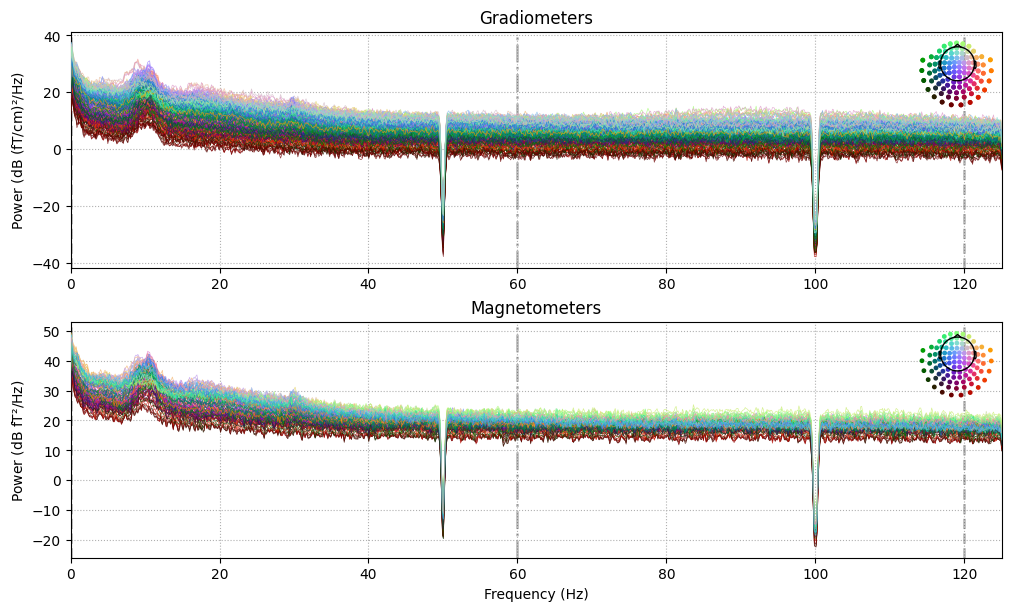

In [21]:
raw.plot_psd()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/opt/homebrew/Caskroom/miniconda/base/envs/mfa-internship/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


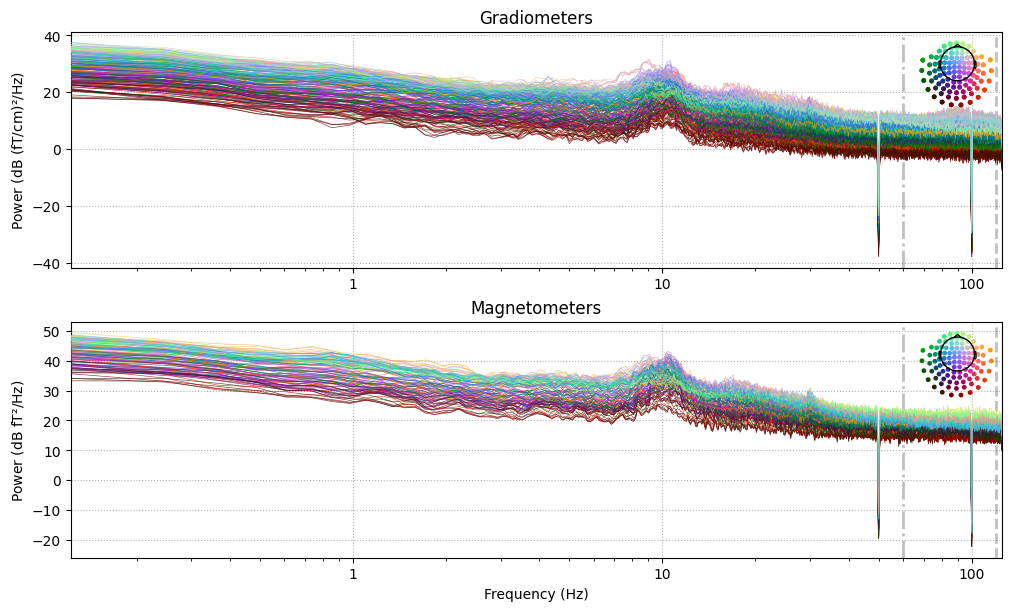

In [20]:
raw.plot_psd(xscale="log")